In [129]:
#Gerekli olan kütüphanelerin tanımlanması
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Pandasın istenilen sayıda satır ve float kısımda gösterilecek basamak ayarı
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [130]:
# veri kümesinin okunması.
training_df = pd.read_csv("california_housing_train.csv")

# Veri nin değerlerinin ölçeklendirilmesi, veride herhangi bir değişimi neden olmaz sadece ölçeklendirir.
training_df["median_house_value"] /= 1000.0

# Veririni tanımlanması, incelenmesiPrint the first rows of the pandas DataFrame.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [131]:
#model oluşturmak için fonkisyon tanımlanıypr 
def build_model(my_learning_rate):
  # sequential modellemesi kullanılıyor basit yönlü olduğu için . 
  #https://www.datasciencearth.com/keras-model-wars-sequential-vs-functional/ detaylı anlatıma burdaan ulaşabilirsiniz
  model = tf.keras.models.Sequential()


  # tek katman  tek nöronlu bir yapı kullanılıyor ve giriş boyutu belirlenmesi
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Model derleniyor optimizer olarak Kök kare ortolaması tercih ediliyor (Adams daha başarılı) ve loss değerini 
  # ortalamanın, gerçek değer ile farkınıni karesi toplamı  şeklinde buluyor(wikipedia'dan araştırmanızı tavsiye ederim)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           

# Modeli eğitmek için fonksiyon tanımlaması 

def train_model(model, df, feature, label, epochs, batch_size):


  # Belirlediğimiz modele  verilen genişlik, tekrar sayısı ve veriler ile uyum sağlatıyoruz
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Başlangın nokta ağırlığı bias' ı belirlenmesi.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]


  epochs = history.epoch
  
  # Her tekrarda ayrı ayrı data frame'inin alınması ve gönderilmesi
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


In [140]:
# Modelin grafiğini olduşturma fonksiyonu (Seaborn daha detaylı ve anlaşılır grafik oluşturur)
def plot_the_model(trained_weight, trained_bias, feature, label):
  # eksen tanımı 
  plt.xlabel("feature")
  plt.ylabel("label")

# grafikte göstermek  random olarak örnek seçiyoru
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])



  # daha iyi anlamak için kırmızı çizgi ile lineer regresyon da baz alınan değerleri gösterme
  x0 = 0
  y0 = trained_bias
  x1 = 10
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Ekrana gösterme işlmei
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  #Loss değerlerin epoch a göre değişimi (ÇOK ÖNEMLİ BİR GRAFİK BURADAN MODELİMİZ HAKKINDA BİR ÇOK YORUM YAPACAĞIZ)

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 334577.9688 - root_mean_squared_error: 578.4271
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27842.6680 - root_mean_squared_error: 166.8612
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 26718.2402 - root_mean_squared_error: 163.4572
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26461.6973 - root_mean_squared_error: 162.6705
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25459.7168 - root_mean_squared_error: 159.5610
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 25063.8672 - root_mean_squared_error: 158.3157
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24244.4473 - root_mean_squared_error: 155.7063
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23734.1504 - root_mean_squared_error: 154.0589
Epoch 9/30
567/567 [===========

c:\python\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


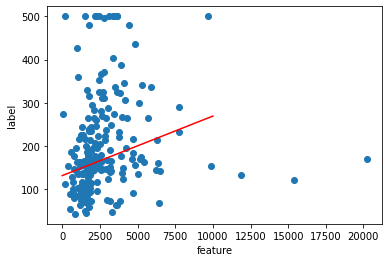

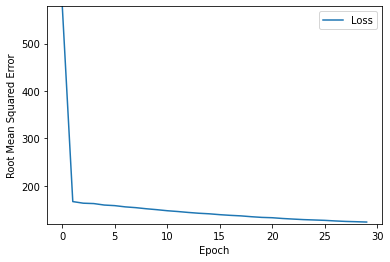

In [135]:
#  hyperparameters değerleri sırasıyla; öğrenme hızı (0.01-0.3) arası olması tavsiye edilir, tekrar sayısı, veri kümesi genişliğini seçiyoruz.
learning_rate = 0.01
epochs = 30
batch_size = 30

# 
my_feature = "total_rooms"  
my_label="median_house_value" 
  

# Modelimizi vereceğimiz değerin boş olduğundan emin oluyoruz.
my_model = None

#Model fonksiyonumuza değerleri gönderiyoruz
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [94]:
my_model.predict([2200.0])

array([[181.5487]], dtype=float32)

In [95]:
training_df[training_df["total_rooms"]==2217.0]["median_house_value"]

4160    498.6
7912    376.1
8328    208.6
8376    500.0
10761   192.6
12049    73.1
16707   178.5
16995   111.4
Name: median_house_value, dtype: float64

Yukarıda ki tahmin ve gerçek değerler incelendiğinde; Total rooms özelliğinin bizim ulaşmamız gereken median house value değeri ile az derecede bağlantılı olduğunu görmekteyiz. Modelimizi değiştirip daha iyi sonuç elde edebiliriz ancak Total rooms özelliği bizim yeterince mantıklı sonuçlar almamızı önleycektir

In [97]:
#veri setinde korelasyona bakacağız hangi özellik bizim için en mantıklısı karar vereceğiz
training_df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.0
median_income         0.7
total_rooms           0.1
housing_median_age    0.1
households            0.1
total_bedrooms        0.0
population           -0.0
longitude            -0.0
latitude             -0.1
Name: median_house_value, dtype: float64

Epoch 1/20
340/340 [==============================] - 2s 1ms/step - loss: 50772.5664 - root_mean_squared_error: 225.3277
Epoch 2/20
340/340 [==============================] - 1s 2ms/step - loss: 43723.6875 - root_mean_squared_error: 209.1021
Epoch 3/20
340/340 [==============================] - 0s 1ms/step - loss: 37243.4688 - root_mean_squared_error: 192.9857
Epoch 4/20
340/340 [==============================] - 0s 1ms/step - loss: 31484.2734 - root_mean_squared_error: 177.4381
Epoch 5/20
340/340 [==============================] - 0s 1ms/step - loss: 26307.7129 - root_mean_squared_error: 162.1965
Epoch 6/20
340/340 [==============================] - 0s 1ms/step - loss: 21746.9121 - root_mean_squared_error: 147.4683
Epoch 7/20
340/340 [==============================] - 0s 1ms/step - loss: 17792.1387 - root_mean_squared_error: 133.3872
Epoch 8/20
340/340 [==============================] - 0s 1ms/step - loss: 14475.6777 - root_mean_squared_error: 120.3149
Epoch 9/20
340/340 [============

c:\python\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


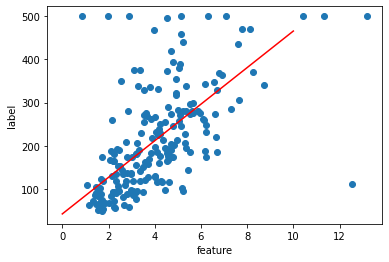

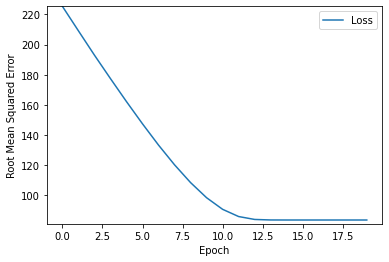

In [142]:
# median income ile median house value birbirleriyle ne kadar benzediğini görmekteyiz feature olarak 
#median income değerini vermeliyiz
#  hyperparameters değerleri sırasıyla; öğrenme hızı (0.01-0.3) arası olması tavsiye edilir, tekrar sayısı, veri kümesi genişliğini seçiyoruz.
learning_rate = 0.01
epochs = 20
batch_size = 50

# 
my_feature ="median_income"  
my_label="median_house_value" 
  

# Modelimizi vereceğimiz değerin boş olduğundan emin oluyoruz.
my_model1 = None

#Model fonksiyonumuza değerleri gönderiyoruz
my_model1 = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model1, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


In [144]:
my_model1.predict([2.7])

array([[156.58824]], dtype=float32)

In [122]:
training_df[training_df["median_income"]==2.6]["median_house_value"]

5269    180.6
7286    171.4
7484    313.6
12994   172.8
15217   132.6
Name: median_house_value, dtype: float64

In [124]:
#daha makul değerler elde etmiş olduk hyperparametreler değiştirilerek ya da model yapısı yeniden kurgulanarak daha doğru 
#sonuçlar elde edilebilir